# <center> Лабороторна робота 3 (частина 2) <center>

# <center> Дослідження моделей хаотичних систем <center>

# <center> Варіант 6 <center>

![systemByVariant](myVar.png)

In [1]:
# Імпорт біліотек
import sympy as sym
sym.init_printing()
from tkinter import *
from IPython.display import display

## Завдання 1. Координати особливих точок

![task1](task1.png)

In [2]:
x,y,z = sym.symbols('x,y,z')

In [3]:
m = sym.Symbol('m')
a = sym.Symbol('a')

In [4]:
f1 = sym.Eq(m*y-a*x, 0)
f2 = sym.Eq(x*z-y, 0)
f3 = sym.Eq(1-x*y-z, 0)
sym.solve([f1,f2,f3],(x,y,z))

In [5]:
a = 5

In [6]:
def calc_values():
    m = w.get()
    f1 = sym.Eq(m*y-a*x, 0)
    f2 = sym.Eq(x*z-y, 0)
    f3 = sym.Eq(1-x*y-z, 0)
    sol = sym.solve([f1,f2,f3],(x,y,z))
    display(m)
    display(sol)

In [7]:
val = Tk()
val.geometry("400x180")
w = Scale(val, from_=1, to=119, length=600, tickinterval = 10, orient=HORIZONTAL)
w.pack()
Button(val, text='Calculate', command=calc_values).pack()
mainloop()

## Завдання 2 та 3. Дослідити динаміку системи: розв'язок, графіки, фазовий портрет і проекції 

![task2](task2.png)

![task3](task3.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from scipy.integrate import odeint
from pylab import plot, xlabel, ylabel, legend, show
from mpl_toolkits import mplot3d

In [3]:
y0 = [1, 1, 1]
t = np.linspace(0,50,1001)

In [105]:
# графік розв'язків
def plot_solution(t, x, y, z):
    plt.figure(figsize=(7,5))
    plt.plot(t, x, color='blue', linestyle = '', marker = '.', markersize = 2)
    plt.plot(t, y, color='red', linestyle = '', marker = '.', markersize = 2)
    plt.plot(t, z, color='green', linestyle = '', marker = '.', markersize = 2) 
  
    plt.xlabel('t')
    plt.ylabel('x - blue, y - red, z - green')
    plt.grid(True)

    # легенда: 
    plt.title("Графіки розв'зків")
    plt.show()

In [10]:
# проекція на площину 
def plot_2D_projection(u, v, x_str = 'u', y_str = 'v'):
    plt.figure(figsize=(7,5))
    plt.plot(u,v, color='black', linestyle=' ', marker='.', markersize=2)
    plt.xlabel(f'{x_str}')
    plt.ylabel(f'{y_str}')
    plt.grid(True)
    plt.title(f'Проекція  на площину {x_str, y_str}')
    plt.show()

In [11]:
# фазовий портрет
def plot_3D(x, y, z):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.view_init(60, 60)
    ax.plot3D(x, y, z, 'blue')
    plt.show()

In [12]:
# Функція, що обчислює значення правих частин системи
def right(y, t):
    m = w.get()
    x, y, z = y
    return [m*y-a*x, 
           x*z-y, 
           1-x*y-z]

In [32]:
def find_ans():
    [x, y, z] = odeint(right, y0, t, full_output = False).T
    print([x, y, z])
    plot_solution(t, x, y, z)
    plot_3D(x, y, z)
    plot_2D_projection(x, y, 'x', 'y')
    plot_2D_projection(y, z, 'y', 'z')
    plot_2D_projection(x, z, 'x', 'z')

In [33]:
a = 5

[array([ 1.00000000e+00,  8.22951429e-01,  6.84610331e-01, ...,
       -5.27587826e-12, -5.23845322e-12, -5.20102819e-12]), array([ 1.00000000e+00,  9.94473374e-01,  9.80316994e-01, ...,
       -2.23503111e-11, -2.21917648e-11, -2.20332186e-11]), array([1.        , 0.95584235, 0.92183321, ..., 1.        , 1.        ,
       1.        ])]


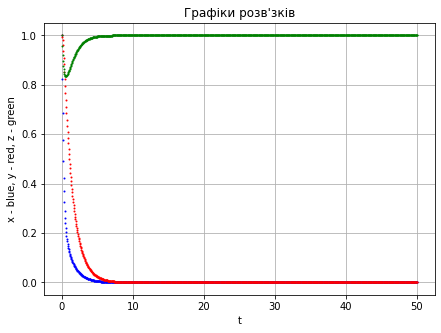

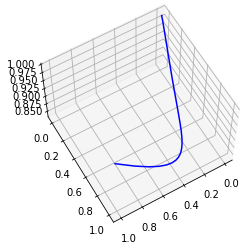

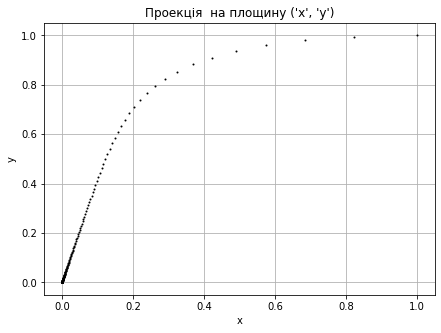

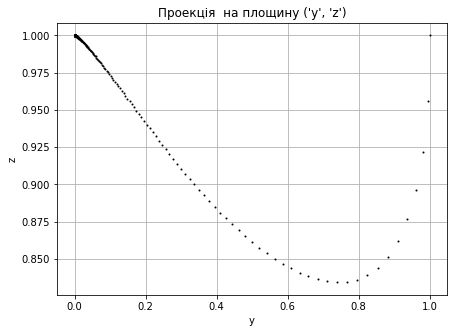

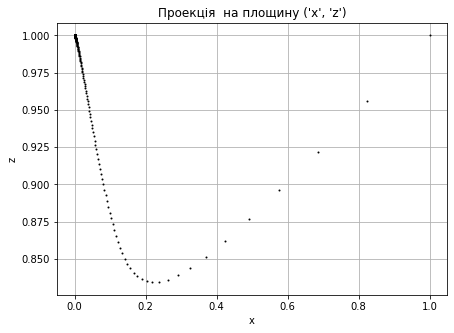

[array([ 1.        ,  3.44280306,  5.59246188, ..., -3.20370882,
       -3.20252566, -3.2045354 ]), array([ 1.        ,  1.05556959,  1.17381983, ..., -0.27055624,
       -0.27154333, -0.2727845 ]), array([1.        , 0.88663375, 0.64450027, ..., 0.08973507, 0.09179294,
       0.09356995])]


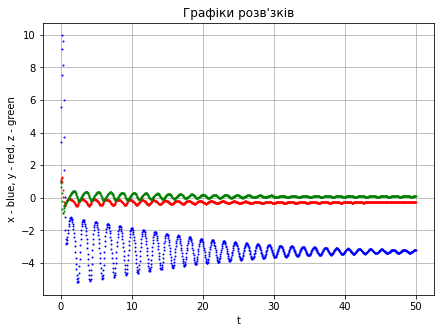

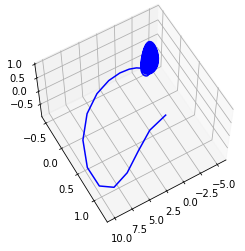

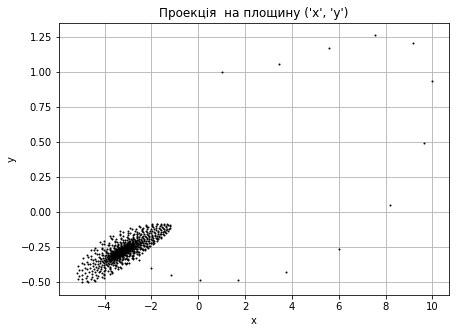

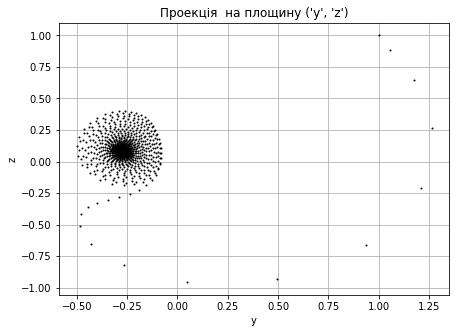

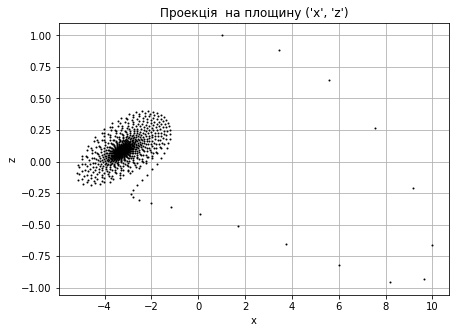

[array([ 1.        ,  6.27104095, 11.29946477, ...,  3.48531886,
        3.78617438,  3.98808589]), array([1.        , 1.1149562 , 1.29881175, ..., 0.20775999, 0.20019988,
       0.1952922 ]), array([1.        , 0.80916968, 0.29193509, ..., 0.00806208, 0.02021471,
       0.03048664])]


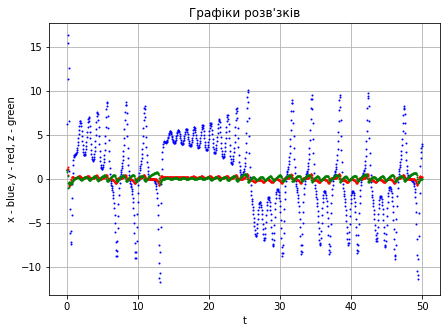

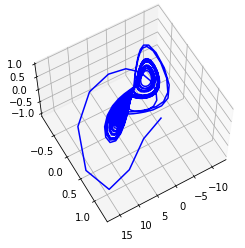

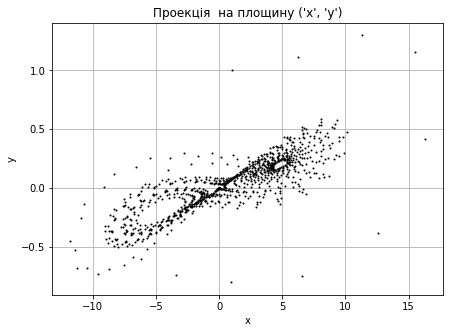

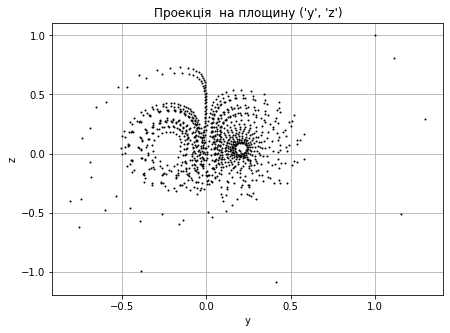

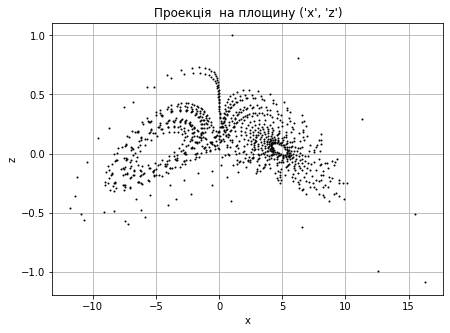

In [34]:
plot = Tk()
plot.geometry("400x180")
w = Scale(plot, from_=1, to=119, length=600, tickinterval = 10, orient=HORIZONTAL)
w.pack()
Button(plot, text='Find', command=find_ans).pack()
mainloop()

## Завдання 4. Дивергенція та дисипативність

![task4](task4.png)

In [44]:
m = sym.Symbol('m')
a = sym.Symbol('a')
b = sym.Symbol('b')
x,y,z = sym.symbols('x,y,z')

In [45]:
sym.diff(m*y-a*x, x) + sym.diff(x*z-y, y) + sym.diff(1-x*y-z, z)

## Завдання 5. Характеристичний многочлен для особливих точок, їх координати

![task5](task5.png)

In [4]:
# особливі точки в залежності від m 
def Num_Cord_Spec_point(m):
    f1 = sym.Eq(m*y-a*x, 0)
    f2 = sym.Eq(x*z-y, 0)
    f3 = sym.Eq(1-x*y-z, 0)
    return sym.solve([f1,f2,f3],(x,y,z))

In [5]:
# якобіан у символьному вигляді
def Jacobian(v_str, f_list):
    vars = sym.symbols(v_str)
    f = sym.sympify(f_list)
    J = sym.zeros(len(f),len(vars))
    for i, fi in enumerate(f):
        for j, s in enumerate(vars):
            J[i,j] = sym.diff(fi, s)
    return J

In [6]:
Jacobian('x, y, z', ['m*y-a*x','x*z-y', '1-x*y-z'])

⎡-a  m   0 ⎤
⎢          ⎥
⎢z   -1  x ⎥
⎢          ⎥
⎣-y  -x  -1⎦

In [7]:
B = Jacobian('x, y, z', ['m*y-a*x','x*z-y', '1-x*y-z'])

In [78]:
# чисельному 
def Num_Jacobian(x,y,z): 
    B = np.zeros((3,3), dtype = complex)
    B[0,0]  = -a
    B[0,1]  =  m
    B[0,2]  =  0
    B[1,0]  =  z
    B[1,1]  = -1
    B[1,2]  =  x
    B[2,0]  = -y
    B[2,1]  = -x
    B[2,2]  = -1
    return B.round(2)

In [83]:
def dote(o): 
    # якобіан в чисельному вигляді для особливої точки 
    display(o)
    B = Num_Jacobian(o[0], o[1], o[2])
    display(B)
    # власні значення (визначення типу)
    print(np.linalg.eigvals(B).round(2))

In [84]:
a = 5

In [85]:
def find_dotes():
    m = w.get()
    # пошук особливих точок 
    q = Num_Cord_Spec_point(m)
    display(q)
    # точки: 
    o1 = list(q[2])
    o2 = list(q[1])
    o3 = list(q[0])
    dote(o1)
    dote(o2)
    dote(o3)

In [86]:
dot = Tk()
dot.geometry("400x180")
w = Scale(dot, from_=1, to=119, length=600, tickinterval = 10, orient=HORIZONTAL)
w.pack()
Button(dot, text='Find', command=find_dotes).pack()
mainloop()

array([[-5.+0.j  ,  1.+0.j  ,  0.+0.j  ],
       [ 5.+0.j  , -1.+0.j  ,  0.+0.89j],
       [ 0.-4.47j,  0.-0.89j, -1.+0.j  ]])

[-5.89+0.j  0.73+0.j -1.84+0.j]


array([[-5.+0.j  ,  1.+0.j  ,  0.+0.j  ],
       [ 5.+0.j  , -1.+0.j  ,  0.-0.89j],
       [ 0.+4.47j,  0.+0.89j, -1.+0.j  ]])

[-5.89+0.j  0.73+0.j -1.84+0.j]


array([[-5.+0.j,  1.+0.j,  0.+0.j],
       [ 1.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j]])

[-5.24+0.j -0.76+0.j -1.  +0.j]


array([[-5.  +0.j,  1.  +0.j,  0.  +0.j],
       [ 0.08+0.j, -1.  +0.j,  3.29+0.j],
       [-0.28+0.j, -3.29+0.j, -1.  +0.j]])

[-5.05-0.j   -0.98+3.31j -0.98-3.31j]


array([[-5.  +0.j,  1.  +0.j,  0.  +0.j],
       [ 0.08+0.j, -1.  +0.j, -3.29+0.j],
       [ 0.28+0.j,  3.29+0.j, -1.  +0.j]])

[-5.05-0.j   -0.98+3.31j -0.98-3.31j]


array([[-5.+0.j,  1.+0.j,  0.+0.j],
       [ 1.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j]])

[-5.24+0.j -0.76+0.j -1.  +0.j]


array([[-5.  +0.j,  1.  +0.j,  0.  +0.j],
       [ 0.04+0.j, -1.  +0.j,  4.77+0.j],
       [-0.2 +0.j, -4.77+0.j, -1.  +0.j]])

[-5.03+0.j   -0.99+4.78j -0.99-4.78j]


array([[-5.  +0.j,  1.  +0.j,  0.  +0.j],
       [ 0.04+0.j, -1.  +0.j, -4.77+0.j],
       [ 0.2 +0.j,  4.77+0.j, -1.  +0.j]])

[-5.03+0.j   -0.99+4.78j -0.99-4.78j]


array([[-5.+0.j,  1.+0.j,  0.+0.j],
       [ 1.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j]])

[-5.24+0.j -0.76+0.j -1.  +0.j]


## Завдання 6. Чутливість до початкових умов та стійкість

![task6](task6.png)

In [95]:
y0_1 = [1, 0, 0]
y0_2 = [1.00001, 0, 0]
t = np.linspace(0,50,1001)

In [96]:
a = 5
m = 119

In [97]:
# Функція, що обчислює значення правих частин системи
def right(y, t):
    x, y, z = y
    return [m*y-a*x, 
           x*z-y, 
           1-x*y-z]

In [98]:
# знаходження чисельного розв'язку системи 
[x1, y1, z1] = odeint(right, y0_1, t, full_output=False).T
[x2, y2, z2] = odeint(right, y0_2, t, full_output=False).T

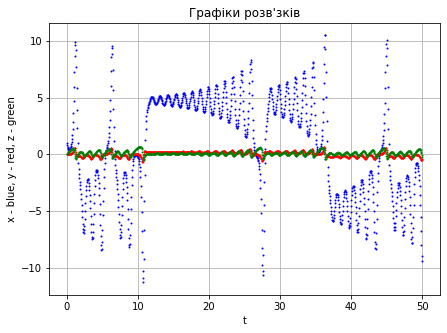

In [106]:
plot_solution(t, x1, y1, z1)

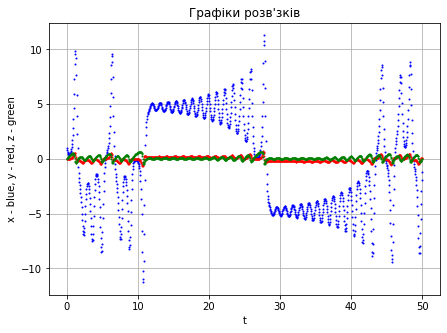

In [107]:
plot_solution(t, x2, y2, z2)

In [112]:
def plot_solution_1(t, u1, v1, u_str = 'u1', v_str = 'v1'):
    plt.figure(figsize=(7, 5))

    plt.plot(t, u1, color='red', linestyle=' ', marker='.', markersize=2)
    plt.plot(t, v1, color='blue', linestyle=' ', marker='*', markersize=2)

    plt.xlabel('t')
    plt.ylabel(f'{u_str} - red, {v_str} - blue')
    plt.grid(True)
    
    # легенда: 
    plt.title("Графіки розв'язків для різних початкових умов")
    plt.show()    

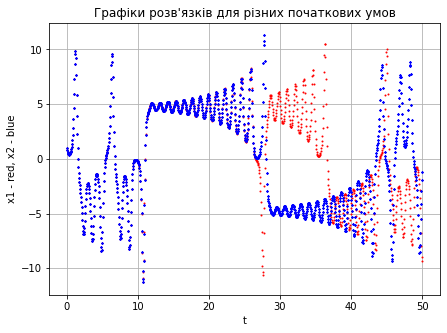

In [113]:
plot_solution_1(t, x1, x2, 'x1', 'x2')

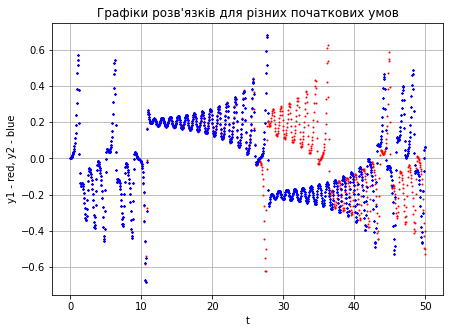

In [114]:
plot_solution_1(t, y1, y2, 'y1', 'y2')

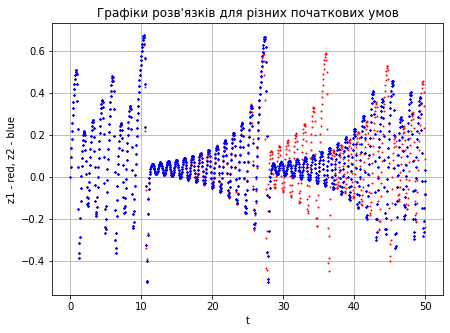

In [115]:
plot_solution_1(t, z1, z2, 'z1', 'z2')